In [3]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [13]:
flying = pd.read_csv('flying-etiquette.csv')

### 1. percent breakdown of survey participants by age range

In [12]:
# first look and see if we have an age column
list(flying.columns)

['RespondentID',
 'How often do you travel by plane?',
 'Do you ever recline your seat when you fly?',
 'How tall are you?',
 'Do you have any children under 18?',
 'In a row of three seats, who should get to use the two arm rests?',
 'In a row of two seats, who should get to use the middle arm rest?',
 'Who should have control over the window shade?',
 'Is itrude to move to an unsold seat on a plane?',
 'Generally speaking, is it rude to say more than a few words tothe stranger sitting next to you on a plane?',
 "On a 6 hour flight from NYC to LA, how many times is it acceptable to get up if you're not in an aisle seat?",
 'Under normal circumstances, does a person who reclines their seat during a flight have any obligation to the person sitting behind them?',
 'Is itrude to recline your seat on a plane?',
 'Given the opportunity, would you eliminate the possibility of reclining seats on planes entirely?',
 'Is it rude to ask someone to switch seats with you in order to be closer to f

In [22]:
flying['Age'].shape

(1040,)

In [27]:
flying['Age'].head(20)

0       NaN
1     30-44
2     30-44
3     30-44
4     30-44
5     30-44
6     30-44
7     30-44
8       NaN
9     30-44
10    30-44
11      NaN
12      NaN
13    30-44
14    18-29
15    18-29
16      NaN
17    30-44
18    30-44
19      NaN
Name: Age, dtype: object

In [31]:
# looking through datasets for information before creating visualizations
# use dropna to ensure nulls are included
flying['Age'].value_counts(dropna = False)

Age
45-60    275
> 60     258
30-44    254
18-29    220
NaN       33
Name: count, dtype: int64

In [65]:
flying['Age'].value_counts(dropna = False, normalize = True)* 100

Age
45-60    26.442308
> 60     24.807692
30-44    24.423077
18-29    21.153846
NaN       3.173077
Name: proportion, dtype: float64

In [28]:
flying['Age'].dtype

dtype('O')

In [30]:
flying['Age'].isnull().sum()

33

In [75]:
g = flying.groupby('Age')

In [74]:
# returns groupby object. 
g2 = flying.groupby(['Age','Gender'])

In [35]:
# turns columns in dictionary essentially
g.groups

{'18-29': [14, 15, 20, 22, 23, 24, 26, 28, 30, 34, 35, 36, 37, 38, 40, 42, 43, 44, 45, 47, 49, 51, 52, 55, 60, 62, 69, 70, 72, 75, 76, 79, 81, 88, 105, 107, 109, 111, 113, 133, 211, 221, 253, 280, 296, 320, 326, 337, 344, 373, 402, 421, 426, 440, 442, 448, 449, 451, 459, 477, 483, 489, 494, 499, 500, 501, 502, 503, 506, 508, 511, 513, 515, 522, 527, 528, 532, 533, 535, 536, 540, 546, 552, 558, 560, 563, 566, 569, 572, 576, 578, 580, 582, 589, 593, 594, 596, 597, 598, 602, ...], '30-44': [1, 2, 3, 4, 5, 6, 7, 9, 10, 13, 17, 18, 21, 25, 27, 29, 31, 33, 39, 41, 46, 48, 50, 53, 54, 56, 57, 58, 59, 61, 64, 65, 66, 67, 68, 71, 73, 74, 77, 78, 80, 82, 83, 84, 85, 86, 91, 93, 98, 101, 117, 122, 129, 161, 169, 174, 184, 185, 187, 188, 191, 192, 193, 194, 196, 197, 198, 200, 201, 205, 206, 208, 212, 214, 215, 216, 217, 220, 224, 225, 227, 230, 242, 247, 249, 256, 258, 264, 265, 266, 267, 275, 279, 282, 283, 286, 290, 292, 293, 295, ...], '45-60': [87, 89, 90, 92, 94, 99, 100, 102, 106, 108, 116,

In [36]:
# value_counts doesn't always work, sometimes need to first group, then find size
g.size()

Age
18-29    220
30-44    254
45-60    275
> 60     258
dtype: int64

<Axes: title={'center': 'Number of Participants by Age'}, xlabel='Age', ylabel='Count'>

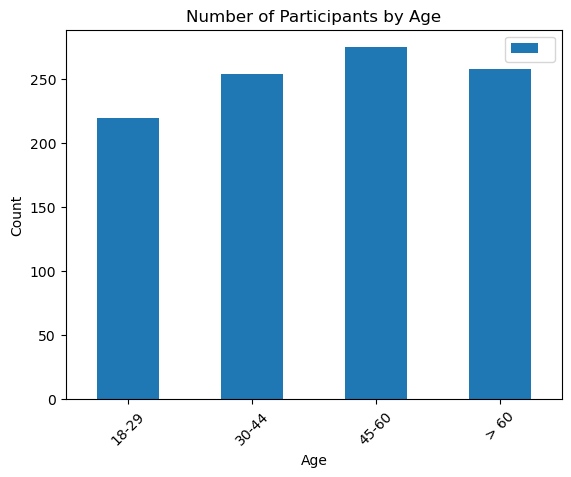

In [42]:
g.size().plot(kind = 'bar', rot = 45, ylabel = 'Count', legend= True, title = 'Number of Participants by Age')

### 2. How did survey respondents feel regarding if it was rude to ask someone to switch seats

In [44]:
# creating variable for name of column (too long!)
col_friends = 'Is it rude to ask someone to switch seats with you in order to be closer to friends?'
flying[col_friends].head()


0                    NaN
1    No, not at all rude
2    No, not at all rude
3     Yes, somewhat rude
4    No, not at all rude
Name: Is it rude to ask someone to switch seats with you in order to be closer to friends?, dtype: object

In [46]:
flying[col_friends].value_counts(dropna = False)

Is it rude to ask someone to switch seats with you in order to be closer to friends?
No, not at all rude    631
NaN                    190
Yes, somewhat rude     184
Yes, very rude          35
Name: count, dtype: int64

In [50]:
f = flying.groupby(col_friends)
f.size()

Is it rude to ask someone to switch seats with you in order to be closer to friends?
No, not at all rude    631
Yes, somewhat rude     184
Yes, very rude          35
dtype: int64

<Axes: title={'center': 'Is it rude to ask someone to switch seats with you in order to be closer to friends?'}, xlabel='Proximity to friends'>

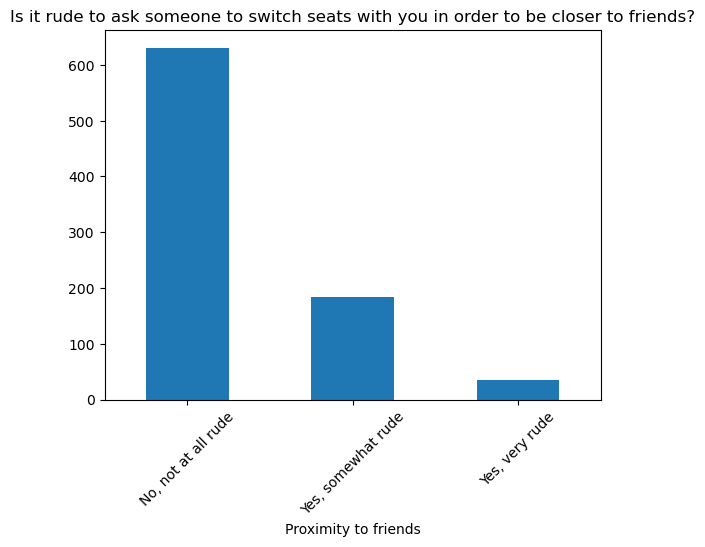

In [61]:
f.size().plot(kind = 'bar', rot = 45, y = 'Count', title = col_friends, xlabel = 'Proximity to friends')

<Axes: title={'center': 'Is it rude to ask someone to switch seats with you in order to be closer to friends?'}, xlabel='Count', ylabel='Is it rude to ask someone to switch seats with you in order to be closer to friends?'>

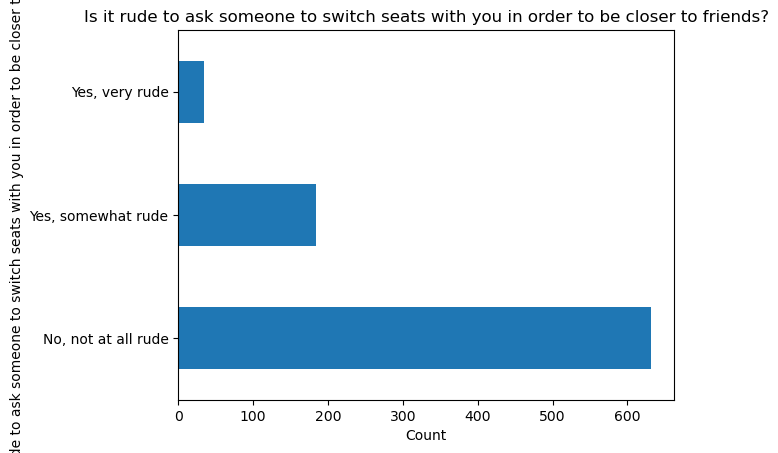

In [60]:
f.size().plot(kind = 'barh', y = 'Count', title = col_friends, xlabel = 'Count')

In [67]:
import seaborn as sns

/Users/snabes/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/snabes/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/snabes/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='Is it rude to ask someone to switch seats with you in order to be closer to friends?', ylabel='count'>

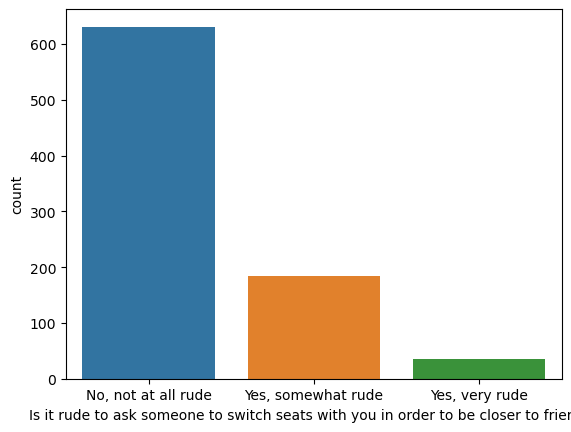

In [68]:
sns.countplot(flying, x = col_friends)

### 3. Use the respondents age as a dimension to see if there are any differences to responses to “it [was] rude to ask someone to switch seats with you in order to be closer to friends?

/Users/snabes/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/snabes/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/snabes/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/snabes/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Categorica

<Axes: xlabel='Is it rude to ask someone to switch seats with you in order to be closer to friends?', ylabel='count'>

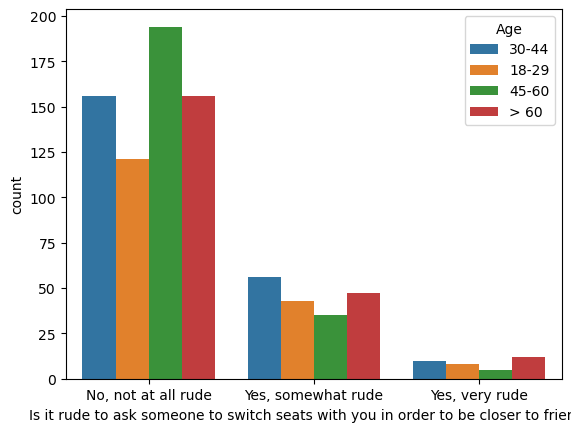

In [69]:
sns.countplot(flying, x = col_friends, hue= 'Age')

/Users/snabes/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/snabes/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/snabes/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/snabes/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Categorica

<Axes: xlabel='Is it rude to ask someone to switch seats with you in order to be closer to friends?', ylabel='count'>

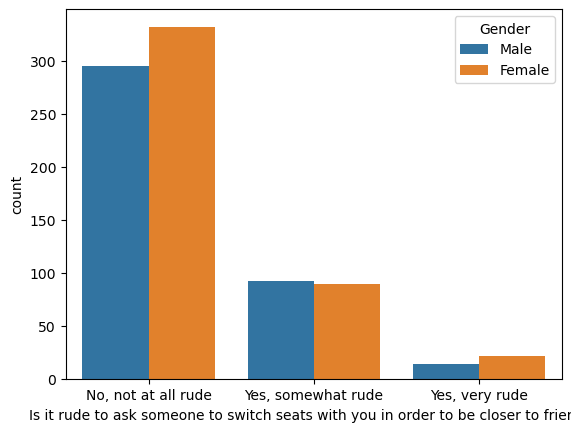

In [70]:
sns.countplot(flying, x = col_friends, hue= 'Gender')

### for fun: multiple plots

/Users/snabes/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/snabes/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/snabes/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/snabes/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Categorica

<Axes: xlabel='Is it rude to ask someone to switch seats with you in order to be closer to friends?', ylabel='count'>

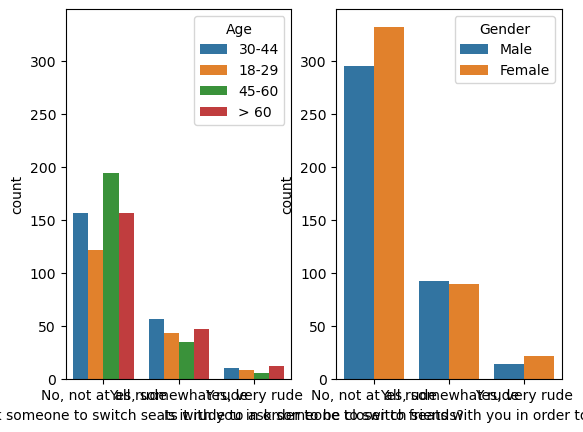

In [79]:
# compare friends response by age and gender
# 2 side by side plots
plt.figure()
ax1 = plt.subplot(1,2,1)
sns.countplot(flying, x = col_friends, hue= 'Age')
ax2= plt.subplot(1,2,2, sharey=ax1)
sns.countplot(flying, x = col_friends, hue= 'Gender')
plt.subplot(1,2,2)

/Users/snabes/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/snabes/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/snabes/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/snabes/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Categorica

<Axes: xlabel='Is it rude to ask someone to switch seats with you in order to be closer to friends?', ylabel='count'>

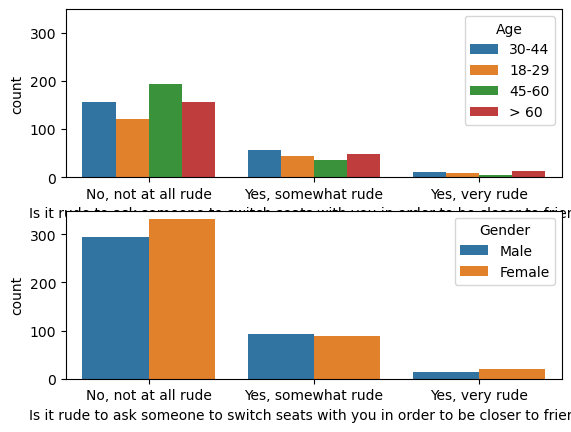

In [83]:
# compare friends response by age and gender
# 2 top and bottom plots
plt.figure()
# first argument is number of rows, second is number of columns, third is current plot number
ax1 = plt.subplot(2,1,1)
sns.countplot(flying, x = col_friends, hue= 'Age')
ax2= plt.subplot(2,1,2, sharey=ax1)
sns.countplot(flying, x = col_friends, hue= 'Gender')

/Users/snabes/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/snabes/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/snabes/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/snabes/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Categorica

<Axes: xlabel='Is it rude to ask someone to switch seats with you in order to be closer to friends?', ylabel='Count'>

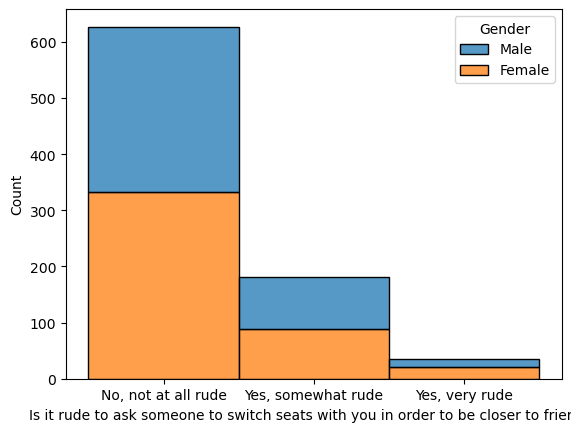

In [85]:
sns.histplot(flying, x = col_friends, hue= 'Gender', multiple = 'stack')

In [86]:
#trying the histogram

flying['Household Income'].head()

0                    NaN
1                    NaN
2    $100,000 - $149,999
3           $0 - $24,999
4      $50,000 - $99,999
Name: Household Income, dtype: object

In [87]:
flying['Age'].head()

0      NaN
1    30-44
2    30-44
3    30-44
4    30-44
Name: Age, dtype: object